<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lasy-losowe" data-toc-modified-id="Lasy-losowe-1">Lasy losowe</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Liczba-estymatorów" data-toc-modified-id="Liczba-estymatorów-1.0.1">Liczba estymatorów</a></span></li><li><span><a href="#Bootstrapping" data-toc-modified-id="Bootstrapping-1.0.2">Bootstrapping</a></span></li></ul></li><li><span><a href="#Trenowanie-pierwszego-modelu-RandomForest-dla-problemu-klasyfikacji" data-toc-modified-id="Trenowanie-pierwszego-modelu-RandomForest-dla-problemu-klasyfikacji-1.1">Trenowanie pierwszego modelu RandomForest dla problemu klasyfikacji</a></span></li><li><span><a href="#Porównianie-lasów-losowych-z-drzewami-decyzyjnymi" data-toc-modified-id="Porównianie-lasów-losowych-z-drzewami-decyzyjnymi-1.2">Porównianie lasów losowych z drzewami decyzyjnymi</a></span><ul class="toc-item"><li><span><a href="#Podobieństwa" data-toc-modified-id="Podobieństwa-1.2.1">Podobieństwa</a></span></li><li><span><a href="#Różnice" data-toc-modified-id="Różnice-1.2.2">Różnice</a></span></li></ul></li><li><span><a href="#Wpływ-parametrów-na-jakość-klasyfikacji" data-toc-modified-id="Wpływ-parametrów-na-jakość-klasyfikacji-1.3">Wpływ parametrów na jakość klasyfikacji</a></span></li><li><span><a href="#Zadanie" data-toc-modified-id="Zadanie-1.4">Zadanie</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_digits, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
import pandas as pd
from mlxtend import plotting

%matplotlib inline

# Lasy losowe

Dokumentacja:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Żeby na szybko podejrzeć sygnaturę konstruktora tej klasy wystarczy wpisać poniższą komendę:

In [2]:
RandomForestClassifier??

Warto zwrócić uwagę na podobieństwo do parametrów drzewa decyzyjnego - las losowy to budowa dużej ilości drzew decyzyjnych o takich samych hiperparametrach.

```Init signature:
ensemble.RandomForestClassifier(
    n_estimators='warn',          # ilość drzew, domyślnie 10 lub 100 w zależności od wersji sklearn
    criterion='gini',             # miara nieczystości zestawu danych
    max_depth=None,               # maksymalna głębokść drzewa
    min_samples_split=2,          # minimalna liczba przykładów do podzielenia drzewa
    min_samples_leaf=1,           # minimalna liczba próbek w liściu
    max_features='auto',          # ile cech jest branę pod uwagę w każdym podziale (w każdym splicie)
    max_leaf_nodes=None,          # maksymalna ilość liści - podobne do maksymalnej głębokości
    min_impurity_decrease=0.0,    # jakie minimalne ulepszenie nieczystości musimy osiągnąć, by podzielić drzewo
    bootstrap=True,               # czy używać bootstrappingu
    n_jobs=None,                  # -1 dla zrównoleglania obliczeń na wszystkich rdzeniach procesora
    
    ...
)
```

Większość z tych parametrów, które zostały wymienione, kontroluje ograniczenia nakładane na rozrost drzewa. Pokrywają się one z drzewem decyzyjnym.
Najbardziej istotne dla nas są: `n_estimators`, `max_features` oraz `boostrap`.

### Liczba estymatorów

Ile drzew chcemy budować. Kluczowym jest to, że im więcej drzew, tym więcej wariantów rozwiązania problemu będziemy otrzymywać i tym bardziej "uśrednione" będą ostateczne wyniki.

### Bootstrapping

Bootstrapping to technika losowania podpróbki, która prowadzi otrzymywania różnych drzew. Źródłem skuteczności lasów losowych jest otrzymywanie różnych drzew za każdym razem. Najlepszą techniką jest uzyskiwanie drzew na losowych podzbiorach zbioru uczącego. W ten sposób już na samym początku miary nieczystosci dla każdego podziału będą inne co sprowadzi się do zróżnicowania struktury każdego z drzew.


## Trenowanie pierwszego modelu RandomForest dla problemu klasyfikacji

Jesteśmy już zaznajomieni z treningiem estymatorów w sklearn. Poniższy kod powinien być zrozumiały - różnicą względem innych estymatorów są parametry w konstruktorze i sama nazwa klasy.

In [3]:
iris = load_iris()

In [4]:
pd.DataFrame(iris['data'], columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=1)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', max_depth=4, bootstrap=True, random_state=1)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=5, random_state=1)

In [11]:
rf_classifier.score(X_test, y_test)

0.9736842105263158

In [25]:
rf_classifier.predict(X_train) ####-> predykcja ktora daje y na zbiorze treningowym

array([1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 0])

In [26]:
y_train ### label na zbiorze treningowym

array([1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1,
       2, 0])

In [28]:
rf_classifier.score(X_train, y_train) #wynik na tescie

0.9732142857142857

In [27]:
rf_classifier.score(X_train, rf_classifier.predict(X_train)) #perfekcyjna predykcja bo porowna nie na tescie tylko "poza modelem"

1.0

In [ ]:
#acc na train - 1.0
#acc na test  - 0.97

Parametrs estimators_ listuje drzewa decyzyjne, które są wykorzystywane w danym ensemblu. Można je zwizualizować jak każde inne drzewo decyzyjne.

In [29]:
rf_classifier.estimators_

[DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1791095845),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=2135392491),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_depth=4, max_features='auto',
                        random_state=1857819720),
 DecisionTreeClassifier(max_depth=4, max_features='auto', random_state=491263)]

In [30]:
rf_classifier.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1791095845)

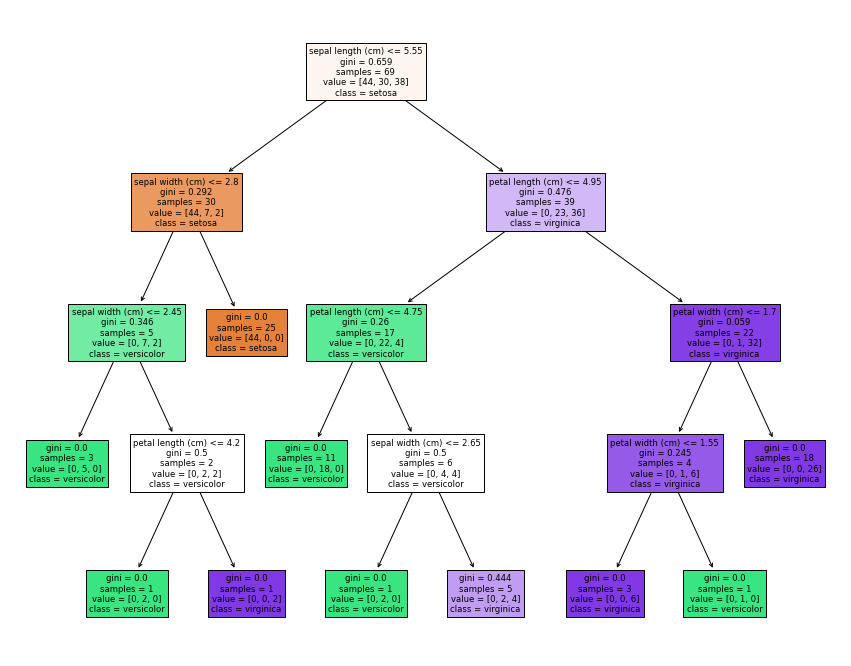

In [31]:
plt.figure(figsize = (15,12))

plot_tree(rf_classifier.estimators_[0],
          feature_names=iris.feature_names,
          class_names=iris.target_names,
         filled=True);

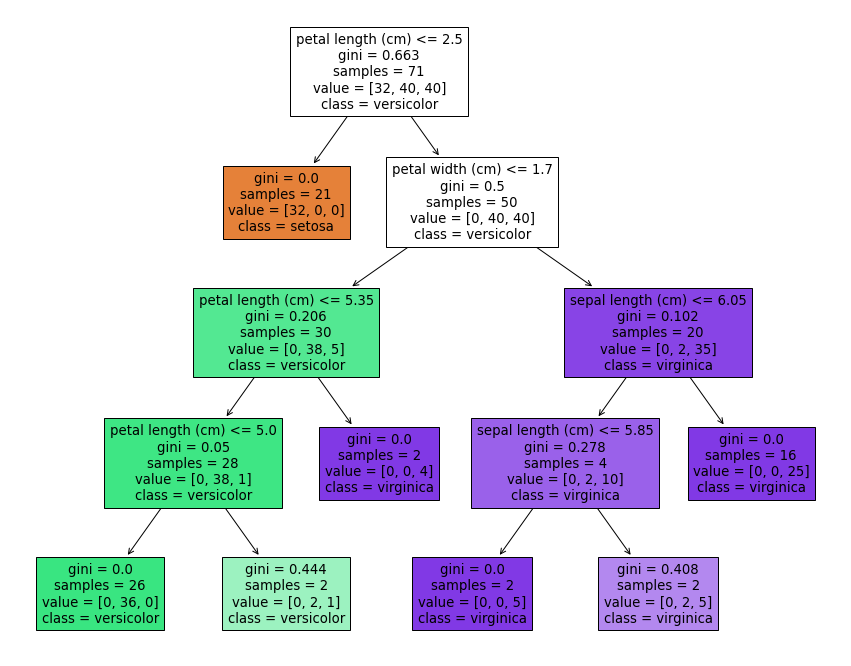

In [32]:
plt.figure(figsize = (15,12))
plot_tree(rf_classifier.estimators_[1],
          feature_names=iris.feature_names,
          class_names=iris.target_names,
         filled=True,);

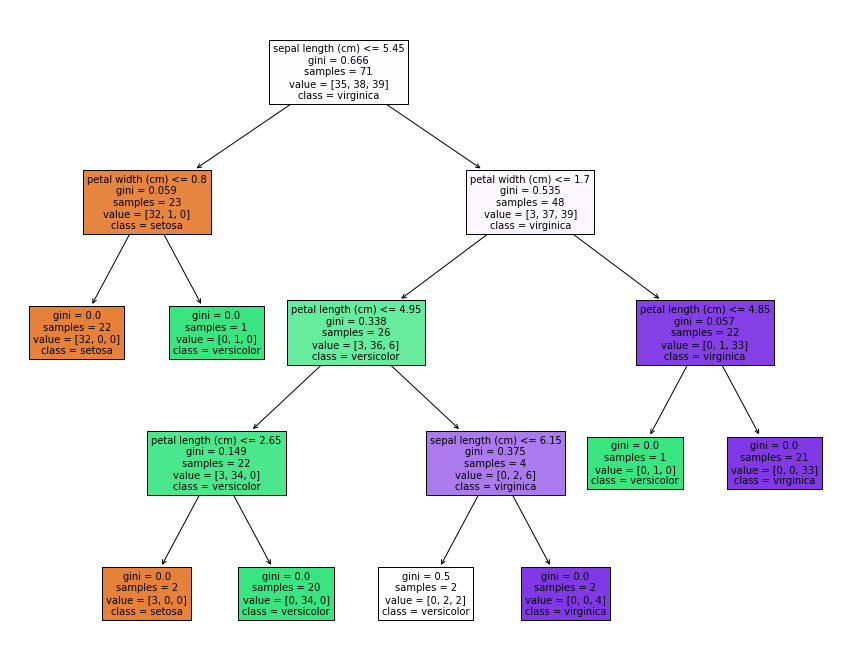

In [33]:
plt.figure(figsize = (15,12))
plot_tree(rf_classifier.estimators_[2],
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,);

Lasy losowe pozwalają na uzyskanie oszacowania istotności każdej ze zmiennych.

In [35]:
rf_classifier.feature_importances_

array([0.3302671 , 0.09015026, 0.36874061, 0.21084203])

In [34]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=iris.feature_names,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
petal length (cm),0.368741
sepal length (cm),0.330267
petal width (cm),0.210842
sepal width (cm),0.090150


## Porównianie lasów losowych z drzewami decyzyjnymi

### Podobieństwa

Sklearn zawiera w sobie kilkanaście generatorów do danych syntetycznych, pozwalających wizualizować naturę klasyfikatorów. Skorzystajmy z jednego z nich.

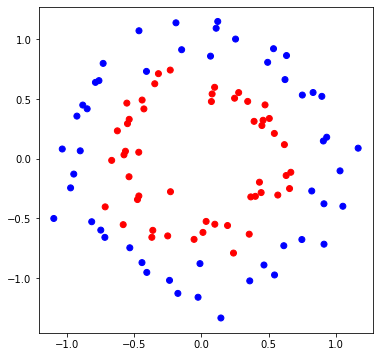

In [36]:
X, y = make_circles(100, noise=0.1, random_state=0, factor=0.6)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=["brg"[x] for x in y])

In [37]:
def decision_regions(data, target, classifier, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    plotting.plot_decision_regions(X=data, y=target, clf=classifier, legend=2)
    plt.scatter(data[:, 0], data[:, 1], c=["brg"[x] for x in target])

In [38]:
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=7, bootstrap=True, random_state=1)
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=1)
lr_classifier = LogisticRegression(random_state=1)

rf_classifier.fit(X, y)
tree_classifier.fit(X, y)
lr_classifier.fit(X, y);

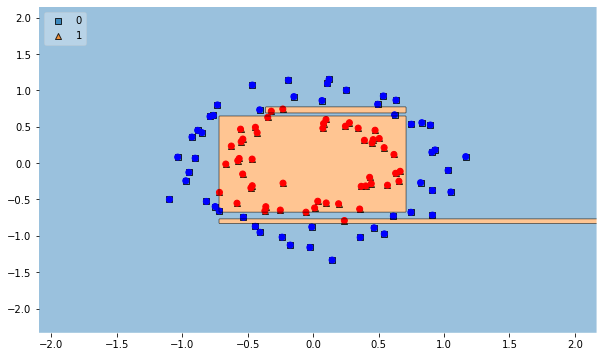

In [39]:
#tree
decision_regions(X, y, tree_classifier, figsize=(10, 6))

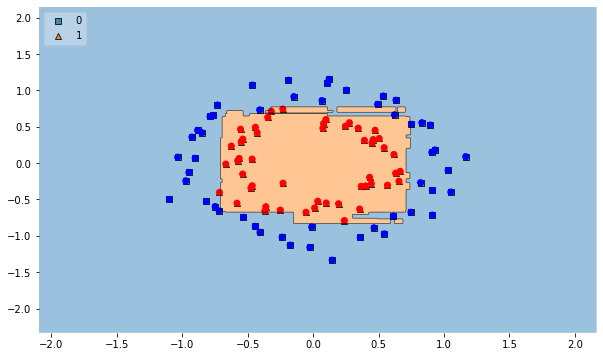

In [40]:
decision_regions(X, y, rf_classifier, figsize=(10, 6))

Zarówno lasy jak i drzewa decyzyjne mają podobną, "kanciastą" granicę decyzyjną z pewną ilością wysp, próbującą się dopasować możliwie dobrze do zestawu treningowego. Dla porównania - regresja logistyczna nie jest w stanie rozwiązać tego problemu - jest on nieliniowy:

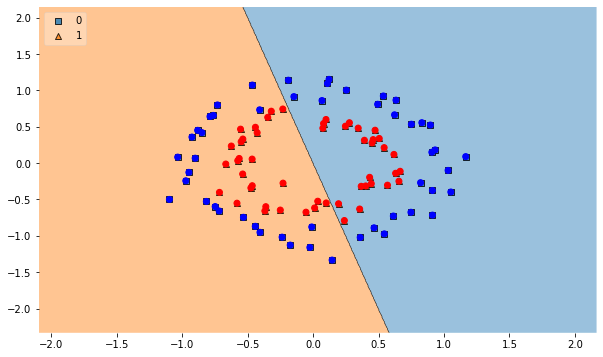

In [41]:
decision_regions(X, y, lr_classifier, figsize=(10, 6))

### Różnice

Skorzystajmy w jeszcze innego zestawu danych - datasetu skanów cyfr. Są to listy składające się z wartości odpowiadającym 8x8 pikseli.

In [ ]:
#obrazy - każdy obraz jest reprezentowany przez piksele. piksel - kolumna
#obrazek 8x8 = 64 kol. 

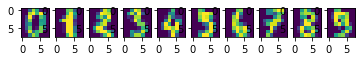

In [42]:
digits = load_digits()

fig, axes = plt.subplots(1, 10)

for i in range(10):
    axes[i].imshow(digits.data[i].reshape(8, 8))

In [45]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [43]:
digits.data[1].reshape(8, 8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [47]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

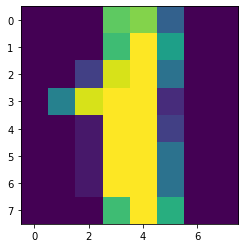

In [46]:
plt.imshow(digits.data[1].reshape(8, 8))

In [49]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

rf_classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10, bootstrap=True, random_state=1)
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10,  random_state=1)

rf_classifier.fit(X_train, y_train)
tree_classifier.fit(X_train, y_train);

In [56]:
tree_classifier.score(X_train, y_train), tree_classifier.score(X_test, y_test)

(0.9784706755753526, 0.84)

In [57]:
rf_classifier.score(X_train, y_train), rf_classifier.score(X_test, y_test)

(0.9985152190051967, 0.9155555555555556)

## Wpływ parametrów na jakość klasyfikacji

In [53]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

Prawdziwa zaleta lasów decyzyjnych polega na tym, że pomimo takiej samej złożoności drzewa, modele te są o wiele bardziej zregularyzowane, gdyż rozwiazują problem na wiele więcej sposobów naraz. Różnicę w overfittingu można bardzo łatwo zobaczyć na wykresie poniżej.

Jest to wykres dokładności treningowej i testowej w zależności od ilości liści w drzewie.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


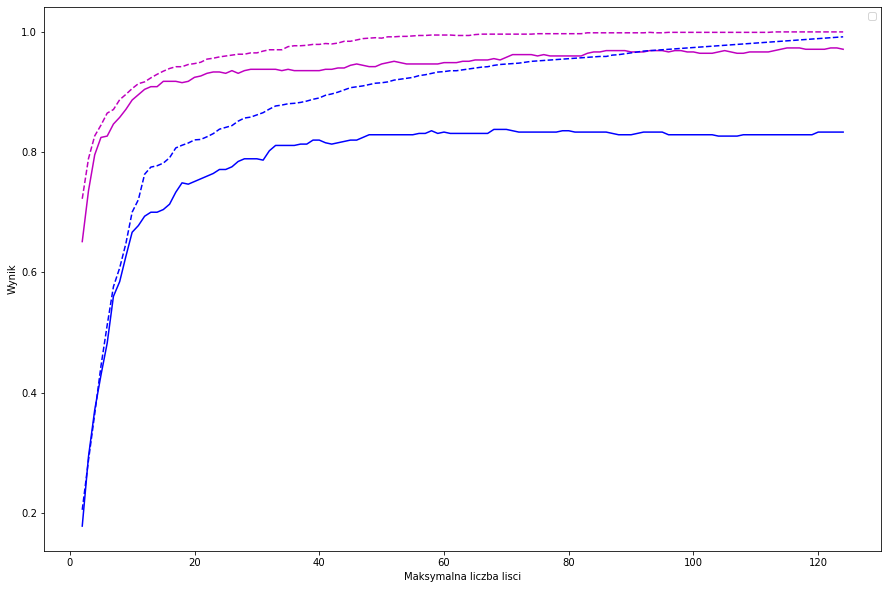

In [62]:
#max_leaf_nodes
tree_train_scores, rf_train_scores, tree_test_scores, rf_test_scores = [], [], [], []


for i in range(2, 125, 1):
    tree_classifier = DecisionTreeClassifier(max_leaf_nodes=i, random_state=1).fit(X_train, y_train)
    tree_train_scores.append(tree_classifier.score(X_train, y_train))
    tree_test_scores.append(tree_classifier.score(X_test, y_test))
    
    rf_classifier = RandomForestClassifier(n_estimators=50, max_leaf_nodes=i, random_state=1).fit(X_train, y_train)
    rf_train_scores.append(rf_classifier.score(X_train, y_train))
    rf_test_scores.append(rf_classifier.score(X_test, y_test))

    
plt.figure(figsize=(15, 10))
plt.xlabel("Maksymalna liczba lisci")
plt.ylabel("Wynik")


plt.plot(range(2, 125, 1), rf_train_scores, 'm--') #las drzew :)
plt.plot(range(2, 125, 1), rf_test_scores, 'm')
plt.plot(range(2, 125, 1), tree_train_scores, 'b--') #drzewo
plt.plot(range(2, 125, 1), tree_test_scores, 'b');

W miarę dokładania ilości drzew wynik powinien stopniowo się poprawiać. Co istotne - niezregularyzowane drzewo powinno osiągać prawie idealne wyniki na zestawie treningowym, więc im większy poziom testowy, tym bliżej do wyniku na zbiorze treningowym = model mniej się przeucza.

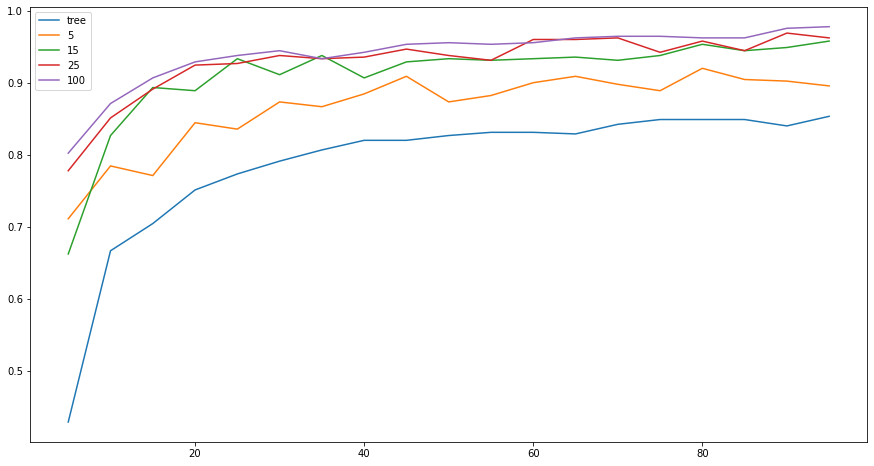

In [63]:
#max_leaf_nodes
tree_test_scores, rf_test_scores = [], [[], [], [], []]

estimators_set = [5, 15, 25, 100]

for node_cnt in range(5, 100, 5):
    tree_classifier = DecisionTreeClassifier(max_leaf_nodes=node_cnt).fit(X_train, y_train)
    tree_test_scores.append(tree_classifier.score(X_test, y_test))
    
    for idx, tree_cnt in enumerate(estimators_set):
        rf_classifier = RandomForestClassifier(n_estimators=tree_cnt, max_leaf_nodes=node_cnt).fit(X_train, y_train)
        rf_test_scores[idx].append(rf_classifier.score(X_test, y_test))


plt.figure(figsize=(15, 8))

plt.plot(range(5, 100, 5), tree_test_scores,label = 'tree')

for i in range(4):
    plt.plot(range(5, 100, 5), rf_test_scores[i], label=estimators_set[i])
_ =plt.legend()

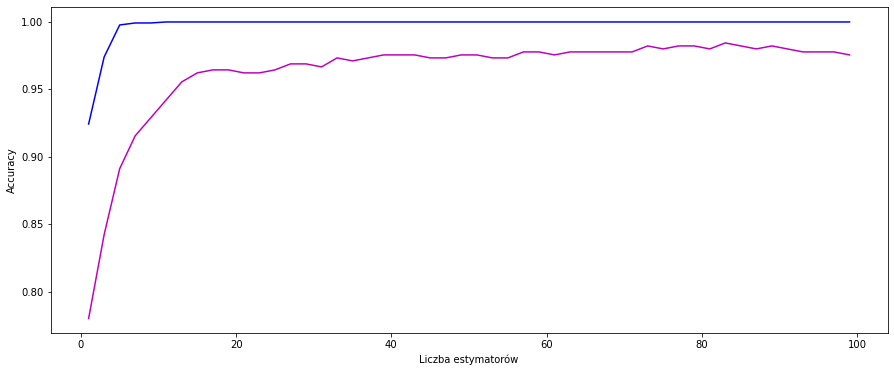

In [64]:
scores_test = []
scores_train = []

for n_estm in range(1, 100, 2):
    rf_classifier = RandomForestClassifier(n_estimators=n_estm, random_state=0).fit(X_train, y_train)
    scores_test.append(rf_classifier.score(X_test, y_test))
    scores_train.append(rf_classifier.score(X_train, y_train))

plt.figure(figsize=(15, 6))
plt.xlabel("Liczba estymatorów")
plt.ylabel("Accuracy")
plt.plot(range(1, 100, 2), scores_test,  'm')
plt.plot(range(1, 100, 2), scores_train, 'b');

## Zadanie

Wykreśl zależność między **min_samples_leaf** i **max_depth** a dokładnością na zbiorze testowym.

(Analogiczny wykres jak ten z max_leaf_nodes i n_estimators).

Użyj poniższego zestawu danych generowanego przez funkcję datasets.make_moons.

Do oceny dokładności użyj metody .score().

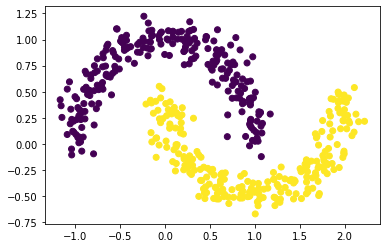

In [65]:
## pobranie danych ##
X, y = make_moons(n_samples=500, noise=0.1)

## podział na zbiór treningowy i testowy ##
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y)

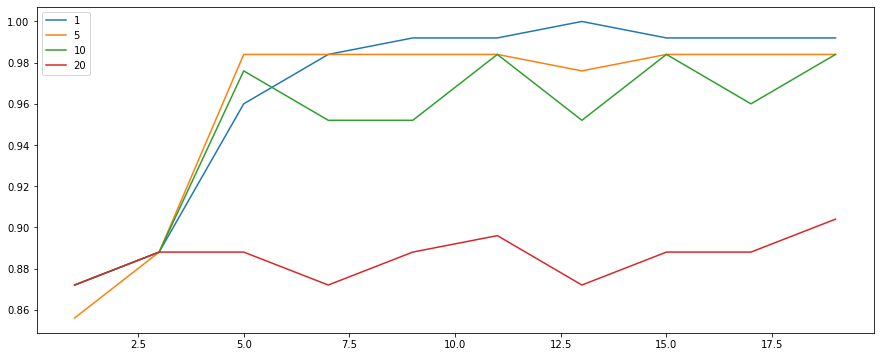

In [66]:
rf_test_scores = [[], [], [], []]
sample_set = [1, 5, 10, 20]

for i in range(1, 20, 2):
    for ix, n in enumerate(sample_set):
        forest = RandomForestClassifier(min_samples_leaf=n, max_depth=i)
        forest.fit(X_train, y_train)
        rf_test_scores[ix].append(forest.score(X_test, y_test))
    

plt.figure(figsize=(15, 6))
for i in range(4):
    plt.plot(range(1, 20, 2), rf_test_scores[i], label=sample_set[i])
    

_ = plt.legend()

In [67]:
forest[0]

DecisionTreeClassifier(max_depth=19, max_features='auto', min_samples_leaf=20,
                       random_state=102327897)

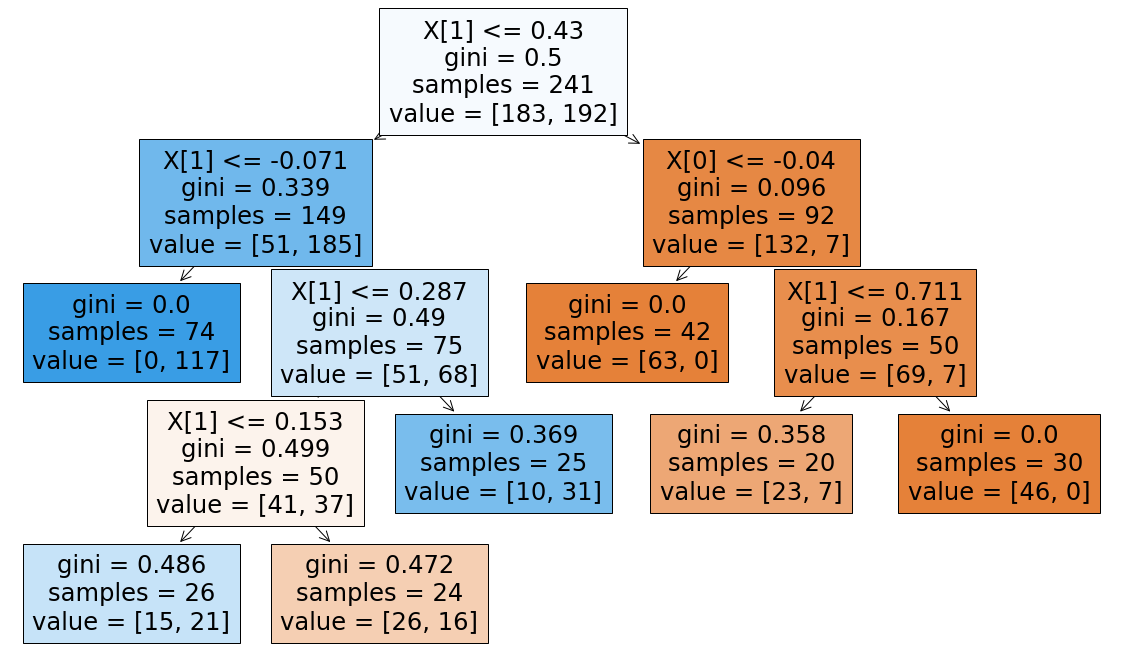

In [68]:
plt.figure(figsize = (20, 12))

plot_tree(forest[0], filled=True,);

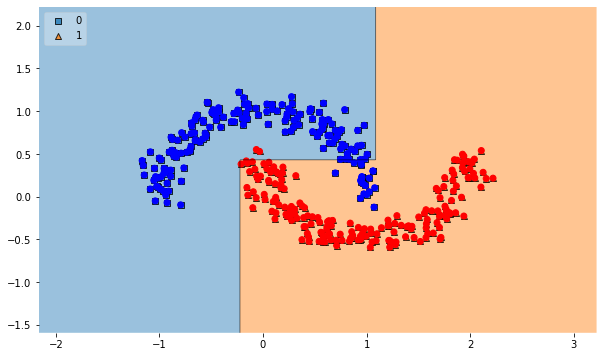

In [78]:
decision_regions(X_train, y_train, forest[8], figsize=(10, 6))

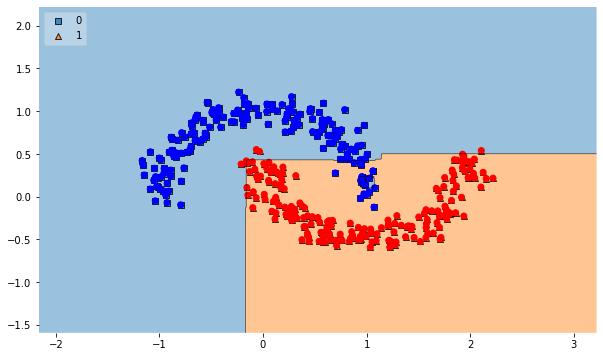

In [70]:
decision_regions(X_train, y_train, forest, figsize=(10, 6))

In [71]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}